In [ ]:
# day25_csv files and Pandas_240729
# csv: Comma Seperated Values

# read the csv file
with open("weather_data.csv") as data_file:
    data = data_file.readlines()
    print(data)

# it is painful to work with the data
# because it is string formal, seperated with comma ,and needs to take a lot of cleaning to use it
# what can we do? we can build a library, csv

In [ ]:
# make temperature list _my solution
import csv
with open("weather_data.csv") as data_file:
    data = csv.reader(data_file)
    # print(data) # created csv object
    # for row in data:
    #     print(row)
    temperatures = []
    temp = []
    for row in data:
        temp.append(row[1])
    temp = temp[1:]
    for t in temp:
        int_tem = int(t)
        temperatures.append(int_tem)
    print(temperatures)

In [ ]:
# make temperature list _teacher solution
with open("weather_data.csv") as data_file:
    data = csv.reader(data_file)
    temperature = []
    for row in data:
        if row[1] != "temp":
            temperature.append(int(row[1]))
    print(temperature)

# reflection: I could have used if !!!

# above codes are too long so we could use pandas library

In [ ]:
# https://pandas.pydata.org/docs/
import pandas
data= pandas.read_csv("weather_data.csv")
print(data["temp"])

In [ ]:
# Dataframe: data table
# Series: column in your table
# In API list, you can see what you can do with pandas
data_dict = data.to_dict()
print(data_dict)

temp_list = data["temp"].to_list()
print(temp_list)

In [ ]:
# Calculate the average temperature _my solution1,2
data = pandas.read_csv("weather_data.csv")
temp_list = data["temp"].to_list()
print(temp_list)
temp_sum = 0
for t in temp_list:
    temp_sum += int(t)
print(temp_sum/len(temp_list))

import numpy
avg = numpy.mean(temp_list)
print(avg)

# Calculate the average temperature _teacher solution1,2
average = sum(temp_list)/len(temp_list)
print(average)

print(data["temp"].mean())

In [ ]:
# find the max value of temperature
print(data["temp"].max())

In [ ]:
# under two lines are same
print(data["condition"])
print(data.condition)

In [ ]:
# Print the row of data which had the highest temperature.
print(data[data.temp == data["temp"].max()])
print(data[data.temp == data.temp.max()])

In [ ]:
# Get the particular data in specific row and column
monday = data[data.day == "Monday"]
print(monday.condition)

In [ ]:
# Convert Monday's temperature to Fahrenheit _my solution
monday = data[data.day == "Monday"]
monday_Cel = monday.temp
print(data[data.day == "Monday"])
monday_Fah = (monday_Cel*9/5)+32
data.loc[data.day == "Monday", "temp"]= monday_Fah
print(data[data.day == "Monday"])

In [ ]:
# Convert Monday's temperature to Fahrenheit _teacher solution
monday = data[data.day == "Monday"]
monday_temp = int(monday.temp)
monday_temp_F = monday_temp*5/9+32

In [ ]:
# Create a dataframe from scratch
data_dict = {
    "student": ["Amy", "James", "Moon"],
    "score": [76, 56, 85]
}
data = pandas.DataFrame(data_dict)
print(data)
data.to_csv("new_data.csv")

In [ ]:
# squirrel_num _my solution
import pandas as pd

data = pd.read_csv("2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20240729.csv")
# data.info()
print(data["Primary Fur Color"].value_counts())

df_dict = {
    "Fur Color": ["grey", "red", "black"],
    "Count": [2473, 392, 103]
}

fur_color_data = pd.DataFrame(df_dict)
# print(fur_color_data)
fur_color_data.to_csv("squirrel_count")

In [ ]:
# squirrel_num _teacher solution
import pandas
data = pandas.read_csv("2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20240729.csv")
grey_squirrels = data[data["Primary Fur Color"] == "Gray"]
print(grey_squirrels)

grey_squirrels_count = len(data[data["Primary Fur Color"] == "Gray"])
red_squirrels_count = len(data[data["Primary Fur Color"] == "Cinnamon"])
black_squirrels_count = len(data[data["Primary Fur Color"] == "Black"])
print(grey_squirrels_count)
print(red_squirrels_count)
print(black_squirrels_count)

# the easiest way to construct a dataframe is to make dictionary
data_dict = {
    "Fur Color": ["Grey", "Cinnamon", "Black"],
    "Count" : [2473, 392, 103]
}

df = pandas.DataFrame(data_dict)
df.to_csv("squirrel_count2")

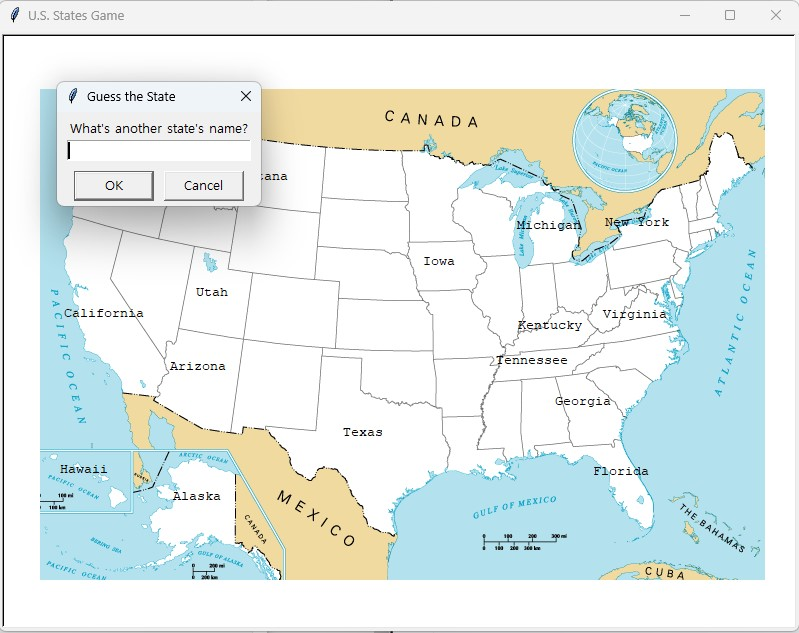

In [1]:
# us_states_game
# Playing scence of the game
from PIL import Image
from IPython.display import display
img = Image.open('us_state_game_playing_240729.jpg')
display(img)

In [ ]:
# us_states_game _my solution
# main.py
import turtle
import pandas
from answer_show import Answer_show

screen = turtle.Screen()
screen.title("U.S. States Game")
screen.setup(width=800, height=600)
image = "blank_states_img.gif"
screen.addshape(image)
turtle.shape(image)

answer_mark = Answer_show()
player_answer = []

data = pandas.read_csv("50_states.csv")
states_list = data["state"].to_list()
# print(states_list)
wrong_answer_data = data

game_is_on = True
while game_is_on:
    answer_state = screen.textinput(title="Guess the State", prompt="What's another state's name?").title()
    # print(answer_state)
    if answer_state in states_list:
        # print(answer_state)

        # get the specific value in dataframe _ver1.0
        # x_cor = int(data.loc[data.state == answer_state, "x"])
        # y_cor = int(data.loc[data.state == answer_state, "y"])
        # answer_mark.mark(x_cor, y_cor, answer_state)

        # get the specific value in dataframe _ver2.0
        answer_data = data[data.state == answer_state]
        answer_mark.mark(int(answer_data.x), int(answer_data.y), answer_state)

        player_answer.append(answer_state)
    if answer_state == "Stop":
        for s in player_answer:
            wrong_answer_data = wrong_answer_data[wrong_answer_data.state != s]
        # print(wrong_answer_data)
        wrong_answer_data.to_csv("wrong_answer_data")
        game_is_on = False


screen.exitonclick()


# reflection
# I made a class 'Answer_show(Turtle)' to show the answer on the screen. It was good and well done to try it.
# I used loc methods of pandas, teahcer selected specific line and then extracted x value of the line. Let's seperate the process to select row and column
# Teacher also used title() function at the input.
# Both used list based thinking to make wrong_answer_data

In [ ]:
# answer_show.py
from turtle import Turtle
FONT = ("Courier", 10, "normal")
class Answer_show(Turtle):
    def __init__(self):
        super().__init__()
        self.penup()
        self.hideturtle()

    def mark(self, x, y, state_name):
        self.goto(x, y)
        self.write(f"{state_name}", align="center", font = FONT)

In [ ]:
# us_states_game _teacher solution
# main.py
import turtle
import pandas

screen = turtle.Screen()
screen.title("U.S State games")
image = "blank_states_img.gif"
screen.addshape(image)
turtle.shape(image)

data = pandas.read_csv("50_states.csv")
all_states = data.state.to_list()
guessed_states = []

while len(guessed_states) < 50:
    answer_state = screen.textinput(title=f"{len(guessed_states)}/50 States Correct",
                                    prompt = "What's another state's name?").title()
    if answer_state == "Exit":
        missing_states = []
        for state in all_states:
            if state not in guessed_states:
                missing_states.append(state)
        new_data = pandas.DataFrame(missing_states)
        new_data.to_csv("states_to_learn.csv")
        break
    if answer_state in all_states:
        guessed_states.append(answer_state)
        t = turtle.Turtle()
        t.hideturtle()
        t.penup()
        state_data = data[data.state == answer_state]
        t.goto(int(state_data.x), int(state_data.y))
        t.write(answer_state)